# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats.distributions as dist
from statsmodels.stats.proportion import proportion_confint
import math

da = pd.read_csv("nhanes_2015_2016.csv")

In [2]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [3]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [4]:
# insert your code here
dx = da[["SMQ020", "RIDAGEYR", "RIAGENDR"]].dropna()
dx["SMQ020"] = dx.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
dx["RIAGENDR"] = dx.RIAGENDR.replace({1: "Male", 2: "Female"})

# Summarize the data by caclculating the proportion of yes responses and the sample size
p = dx.groupby("RIAGENDR")["SMQ020"].agg([lambda z: np.mean(z=="Yes"), "size"])
p.columns = ["Smoke", "N"]
print(p)

# The pooled rate of yes responses, and the standard error of the estimated difference of proportions
p_comb = (dx.SMQ020 == "Yes").mean()
va = p_comb * (1 - p_comb)
se = np.sqrt(va * (1 / p.N.Female + 1 / p.N.Male))

# Calculate the test statistic and its p-value
test_stat = (p.Smoke.Female - p.Smoke.Male) / se
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
print('\n',"test_stat: " + str(test_stat),'\n', "p-value: " +str(pvalue))

             Smoke     N
RIAGENDR                
Female    0.304435  2976
Male      0.512142  2759

 test_stat: -16.01400681759787 
 p-value: 1.0202277513491146e-57


__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

This hypothesis test was conducted to determine if there is a significant difference between the proportion of men and women who smoke. The results show that there is a significant difference, and we can say that there is a larger proportion of men who smoke than women with 95% confidence.

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [5]:
# insert your code here
print("Proportion of Women who smoke Confidence Interval: ")
count_women_smokers = dx.loc[(dx["RIAGENDR"] == "Female") & (dx["SMQ020"] == "Yes")].shape[0]
count_women = dx.loc[(dx["RIAGENDR"] == "Female")].shape[0]
alpha = 0.5
female_conf_interval = proportion_confint(count_women_smokers, count_women, alpha=0.05)
print(female_conf_interval)
print('\n')


print("Proportion of Men who smoke Confidence Interval: ")
count_men_smokers = dx.loc[(dx["RIAGENDR"] == "Male") & (dx["SMQ020"] == "Yes")].shape[0]
count_men = dx.loc[(dx["RIAGENDR"] == "Male")].shape[0]
alpha = 0.5
male_conf_interval = proportion_confint(count_men_smokers, count_men, alpha=0.05)
print(male_conf_interval)
print('\n')

print("Difference in proportions of Women and Men who smoke Confidence Interval: ")
p_women = count_women_smokers / count_women
n_women = count_women
se_female = np.sqrt(p_women * (1 - p_women)/n_women)
se_female

p_men = count_men_smokers/ count_men
n_men = count_men
se_male = np.sqrt(p_men * (1 - p_men)/ n_men)
se_male

se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

d = p_women - p_men
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
print((lcb, ucb))


Proportion of Women who smoke Confidence Interval: 
(0.2879026244757051, 0.3209683432662304)


Proportion of Men who smoke Confidence Interval: 
(0.49349056386167417, 0.5307935970661982)


Difference in proportions of Women and Men who smoke Confidence Interval: 
(-0.2326312298280253, -0.18278196335791153)


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

The first two confidence intervals only let us know with a 95% confidence what the range of likely values is for the proportion of men and women who smoke, but we can see the range for women is significantly less than that for men. THe difference in proportions confidence intervals show a range of all negative values. This supports the conclusion of the previous hypothesis test that daid there was a significantly larger proportion of men who smoke than women.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [6]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [7]:
da.loc[da['DMDEDUC2'] == 5, 'DMDEDUC2'] = "Yes"
da.loc[da['DMDEDUC2'] != "Yes", 'DMDEDUC2'] = "No"

In [13]:
# insert your code here
graduated_height_cent = da.loc[da['DMDEDUC2'] == "Yes", "BMXHT"].dropna()
not_graduated_height_cent = da.loc[da['DMDEDUC2'] != "Yes", "BMXHT"].dropna()

t_stat, p_value = sm.stats.ztest(graduated_height_cent, not_graduated_height_cent)
print("Centimeter height test results: ")
print('t_stat: ' + str(t_stat))
print('p_value: ' + str(p_value))
print('\n')

da['BMXHTINCH'] = da['BMXHT'] / 2.54
graduated_height_inch = da.loc[da['DMDEDUC2'] == "Yes", "BMXHTINCH"].dropna()
not_graduated_height_inch = da.loc[da['DMDEDUC2'] != "Yes", "BMXHTINCH"].dropna()

t_stat, p_value = sm.stats.ztest(graduated_height_inch, not_graduated_height_inch)
print("Inches height test results: ")
print('t_stat: ' + str(t_stat))
print('p_value: ' + str(p_value))

Centimeter height test results: 
t_stat: 7.2007656698012505
p_value: 5.987537169067422e-13


Inches height test results: 
t_stat: 7.200765669801254
p_value: 5.987537169067249e-13


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

The results of our hypothesis test show a p-value that is less than our critical value. This means that we can reject the null hypothesis and state that there is a statistically significant difference.

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

The results do not change at all between the two tests because changing the measurement type does not change the values of the actual measurements.

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [24]:
# insert your code here
men_30_40_bmi = da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (dx["RIAGENDR"] == "Male"), "BMXBMI"].dropna()
men_50_60_bmi = da.loc[(da['RIDAGEYR'] >= 50) & (da['RIDAGEYR'] <= 60) & (dx["RIAGENDR"] == "Male"), "BMXBMI"].dropna()

t_stat, p_value = sm.stats.ztest(men_30_40_bmi, men_50_60_bmi)
print("Age bracket average BMI comparison test results: ")
print('t_stat: ' + str(t_stat))
print('p_value: ' + str(p_value))
print('\n')

da['BMXBMILOG'] = np.log(da['BMXBMI'])
men_30_40_bmi_log = da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (dx["RIAGENDR"] == "Male"), "BMXBMILOG"].dropna()
men_50_60_bmi_log = da.loc[(da['RIDAGEYR'] >= 50) & (da['RIDAGEYR'] <= 60) & (dx["RIAGENDR"] == "Male"), "BMXBMILOG"].dropna()

t_stat, p_value = sm.stats.ztest(men_30_40_bmi_log, men_50_60_bmi_log)
print("Age bracket average BMI comparison test results: ")
print('t_stat: ' + str(t_stat))
print('p_value: ' + str(p_value))

Age bracket average BMI comparison test results: 
t_stat: 0.8984008016755222
p_value: 0.36897190924214873


Age bracket average BMI comparison test results: 
t_stat: 0.7057844184100666
p_value: 0.4803222133688403


__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

Neither of these hypothesis tests produced sufficient evidence to reject the null hypothesis which states there is no difference in BMI between the two age bands.

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [25]:
women_30_40_graduated = da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (dx["RIAGENDR"] == "Female") & (da['DMDEDUC2'] == "Yes")]
women_30_40_not_graduated = da.loc[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (dx["RIAGENDR"] == "Female") & (da['DMDEDUC2'] != "Yes")]

[Text(0,0,'Graduated'), Text(0,0,'Not Graduated')]

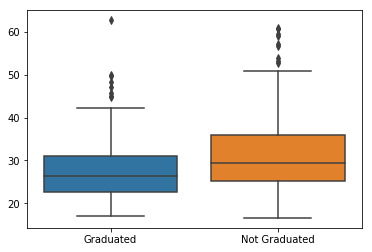

In [63]:
ax = sns.boxplot(data=[women_30_40_graduated['BMXBMI'], women_30_40_not_graduated['BMXBMI']])
ax.set_xticklabels(["Graduated","Not Graduated"])

In [101]:
# insert your code here
print("women_30_40_graduated variance: " +str(women_30_40_graduated['BMXBMI'].var()))
print("women_30_40_graduated variance: " +str(women_30_40_not_graduated['BMXBMI'].var()))
print('\n')

bmi_graduated = women_30_40_graduated['BMXBMI'].dropna()
bmi_graduated = sm.stats.DescrStatsW(bmi_graduated)
bmi_not_graduated = women_30_40_not_graduated['BMXBMI'].dropna()
bmi_not_graduated = sm.stats.DescrStatsW(bmi_not_graduated)

print("pooled : ", sm.stats.CompareMeans(bmi_graduated, bmi_not_graduated).ztest_ind(usevar='pooled'))
print("unequal: ", sm.stats.CompareMeans(bmi_graduated, bmi_not_graduated).ztest_ind(usevar='unequal'))

women_30_40_graduated variance: 54.14405022359821
women_30_40_graduated variance: 68.16290624349801


pooled :  (-4.643908450956424, 3.4187910067116893e-06)
unequal:  (-4.833662355599101, 1.340438616920389e-06)


__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

Both of these statistical tests yeilded results that state our data has strong evidence against the null hypothesis, leading us to the decision to reject the null hypothesis.

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

The two samples have differing variances, although not enough to effect the results of a pooled vs unpooled approach to the hypothesis test.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [115]:
# insert your code here
dx = da[["BPXDI1", "BPXDI2"]].dropna()
db = dx.BPXDI1 - dx.BPXDI2
print(db.mean())
sm.stats.ztest(db)

0.3490407897187558


(4.140387087476751, 3.467202439743513e-05)

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

There is unsufficient evidence to reject the null hypothesis. This means we cannot say with confidence that there is a statsitically significant difference between the two means.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [121]:
# insert your code here
BPXDI1 = dx.BPXDI1.dropna()
BPXDI2 = dx.BPXDI2.dropna()
t_stat, p_value = sm.stats.ztest(BPXDI1, BPXDI2)
print('t_stat: ' + str(t_stat))
print('p_value: ' + str(p_value))

t_stat: 1.405785955157218
p_value: 0.15978769381769953


__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

The first approach is for paired data where the data is collected from the same individual while the second is not. The two different methods provide us with two different resulting answers on whether or not to reject the null hypothesis.